# KNN From Sratch

In this workbook we will guide you through the steps to implement KNN from scratch. Once this is done you'll implement you solution in a class that is tested with the knn_class_tester notebook.

1. Use the ```make_blobs``` function from SKLearn to make a dataset to test your KNN functions.
2. Create helper functions. These will be useful when you go to implement your class.
    - Squaring the difference of two vectors.
    - Summing the square differences and returning the square root.
    - Calculating the euclidian distances
    - An evaluation function to evalaute predictions
3. Create the KNN predcit function

In [97]:
#import libraries
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


### Step 1: Create a sample dataset
1. Use ```make_blobs``` to create a sample set
2. Start with 300 samples, 4 centres, 0.6 standard deviation, and random state 0
3. Plot the samples

In [4]:
#make the dataset with make_blobs
X,y = make_blobs(n_samples=300,centers=4,cluster_std=0.6,random_state=0)


# Step 2: Creating the KNN function
Pseudocode below to help out! Note: **IT IS NOT ACTUAL CODE**

In [7]:
# define train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)


In [8]:
def get_eucledian_distance(v1,v2):
    return np.linalg.norm(v1-v2)

In [61]:
def get_all_distances(X_train,X_test):
    
    dist_list = []
    
    for test_point in X_test:
        dists = []
        
        for train_point in X_train:
            dists.append(get_eucledian_distance(train_point,test_point))
        dist_list.append(np.asarray(dists))
        
    return np.asarray(dist_list)


In [77]:
def select_neighbours(dist_list, k):
    nei_inds = []
    for dists in dist_list:
        nei_inds.append(np.argsort(dists)[:k])
    return np.asarray(nei_inds)
        
        
    #sl = sort(dist_list, by: distance)
    #return 0 to k elements from list (slice)
    

In [92]:
def predict(nei_inds, y_train):
    preds = []
    for neis in nei_inds:
        classes = y_train[neis]
        preds.append(Counter(classes).most_common(1)[0][0])
    return preds
        
    
    #access the index from my sliced_sorted_list
    #get the y_train label corresponding to that index
    #return most_common label among the list

In [121]:
def KNN_func(X_train, X_test, y_train, y_test, k):
    
    dist_list = get_all_distances(X_train,X_test)
    nei_inds = select_neighbours(dist_list, k)
    y_preds = predict(nei_inds,y_train)
    
    score = accuracy_score(y_test,y_preds)
    print('Accuracy: {}'.format(score))
    
    fig, axs = plt.subplots(2,figsize=(10,10))
    axs[0].scatter(X_train[:,0],X_train[:,1],c=y_train)
    axs[1].scatter(X_test[:,0],X_test[:,1],c=y_preds)
    
    
    
    
    # given a vector, [2.5, 4.56, 2]
    # sample X_train : [2.5,4.56] = x1,x2
    # search with same index: y_train = 2
    
    # rember to do it for all X_test vectors
    # CASE: ONE SINGLE X_train vector:
    """
    dist_list = []
    for vector in X_train:
        # result = my get_distance function
        dist_list.append(result, index)
    final_n = select_neighbours(dist_list, k)
    ypred = predict(final_n, y_train)
    score... --> using sklearn.metrics
    or comparing 1 by 1 (ypred - ytest)
    plot... do it inside in a separate function or outside. 
    """
     

Accuracy: 1.0


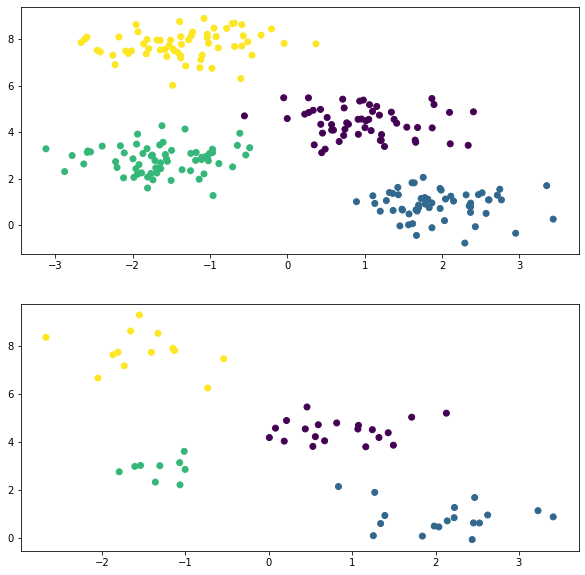

In [122]:
KNN_func(X_train, X_test, y_train, y_test, 3)